In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import pickle
import ast
import pandas
import json
from numpy import array
import timeit  
import nbimporter
import auto_encoder as aec
np.set_printoptions(suppress=True)

Importing Jupyter notebook from auto_encoder.ipynb


In [2]:
def column(matrix, i):
    return [row[i] for row in matrix]

In [3]:
# Linking Id's
'''
project_root = os.path.dirname(os.path.abspath(""))
data_path = os.path.join(project_root, "data\\ratings.csv")
rating = pandas.read_csv(data_path)

project_root = os.path.dirname(os.path.abspath(""))
data_path = os.path.join(project_root, "data\\links.csv")
links = pandas.read_csv(data_path)

project_root = os.path.dirname(os.path.abspath(""))
data_path = os.path.join(project_root, "data\\movies_metadata.csv")
movie_meta = pandas.read_csv(data_path)

joined = links.set_index('tmdbId').join(movie_meta.set_index('id'))

writer = pandas.ExcelWriter('output.xlsx')
joined.to_excel(writer,'Sheet1')
writer.save()
'''
x = 3

In [4]:
# Cleaning less-voted movies from ratings.csv
'''
project_root = os.path.dirname(os.path.abspath(""))
data_path = os.path.join(project_root, "data\\ratings.csv")
rating = pandas.read_csv(data_path, engine='python')

project_root = os.path.dirname(os.path.abspath(""))
data_path = os.path.join(project_root, "data\\movie_votecount.csv")
vote_count = pandas.read_csv(data_path)

votes = column(vote_count.values, 0)
ratings_updated = rating.loc[rating["movieId"].isin(votes)]

file = open("ratings_updated", "wb")
pickle.dump(ratings_updated, file)
'''

'\nproject_root = os.path.dirname(os.path.abspath(""))\ndata_path = os.path.join(project_root, "data\\ratings.csv")\nrating = pandas.read_csv(data_path, engine=\'python\')\n\nproject_root = os.path.dirname(os.path.abspath(""))\ndata_path = os.path.join(project_root, "data\\movie_votecount.csv")\nvote_count = pandas.read_csv(data_path)\n\nvotes = column(vote_count.values, 0)\nratings_updated = rating.loc[rating["movieId"].isin(votes)]\n\nfile = open("ratings_updated", "wb")\npickle.dump(ratings_updated, file)\n'

In [5]:
# Cleaning less-voted movies from ratings.csv
'''
ratings2 = ratings.groupby("userId").count()
ratings2.sort_values("movieId", ascending=False)
writer = pandas.ExcelWriter('user_votecount.xlsx')
ratings2.to_excel(writer,'Sheet1')
writer.save()

project_root = os.path.dirname(os.path.abspath(""))
data_path = os.path.join(project_root, "data\\user_votecount.csv")
user_vote = pandas.read_csv(data_path)

votes = column(user_vote.values, 0)
ratings_updated = ratings.loc[ratings["userId"].isin(votes)]
'''

'\nratings2 = ratings.groupby("userId").count()\nratings2.sort_values("movieId", ascending=False)\nwriter = pandas.ExcelWriter(\'user_votecount.xlsx\')\nratings2.to_excel(writer,\'Sheet1\')\nwriter.save()\n\nproject_root = os.path.dirname(os.path.abspath(""))\ndata_path = os.path.join(project_root, "data\\user_votecount.csv")\nuser_vote = pandas.read_csv(data_path)\n\nvotes = column(user_vote.values, 0)\nratings_updated = ratings.loc[ratings["userId"].isin(votes)]\n'

In [6]:
file = open("ratings_updated", "rb")
rating = pickle.load(file)
rating

,userId,movieId,rating,timestamp
17291,229,1,3.0,1037826148
17292,229,2,3.0,1037827385
17294,229,5,1.0,1037136141
17295,229,7,2.0,1037828170
17297,229,16,3.0,1037829658
17298,229,19,1.0,1037831597
17299,229,21,3.0,1037829730
17300,229,25,4.0,1037826148
17301,229,29,5.0,1037825980
17302,229,32,5.0,1037826063


In [7]:
'''
# Movies turn
m = rating.groupby("movieId").count()
m.sort_values("rating", ascending=False)
writer = pandas.ExcelWriter('movie_votecount.xlsx')
m.to_excel(writer,'Sheet1')
writer.save()

project_root = os.path.dirname(os.path.abspath(""))
data_path = os.path.join(project_root, "data\\movie_votecount2.csv")
movie_vote = pandas.read_csv(data_path)
votes = column(movie_vote.values, 0)
ratings_updated = rating.loc[rating["movieId"].isin(votes)]

# Users turn
u = ratings_updated.groupby("userId").count()
u.sort_values("rating", ascending=False)
writer = pandas.ExcelWriter('user_votecount2.xlsx')
u.to_excel(writer,'Sheet1')
writer.save()


project_root = os.path.dirname(os.path.abspath(""))
data_path = os.path.join(project_root, "data\\user_votecount2.csv")
user_vote = pandas.read_csv(data_path)

votes = column(user_vote.values, 0)
ratings_updated_2 = ratings_updated.loc[rating["userId"].isin(votes)]
ratings_updated_2
'''
rating = ratings_updated_2

NameError: name 'ratings_updated_2' is not defined

In [ ]:
# Movie matrix build
movies = rating["movieId"]
movies = set(movies)
movies = sorted(movies, key=lambda x: int(x), reverse=False)

In [ ]:
# User matrix build
users = rating["userId"]
users = set(users)
users = sorted(users, key=lambda x: int(x), reverse=False)

In [ ]:
# User-movie matrix build
user_movie = np.zeros((len(users),len(movies)), dtype=float)

project_root = os.path.dirname(os.path.abspath(""))
data_path = os.path.join(project_root, "data\\movies.csv")
movies_meta = pandas.read_csv(data_path, encoding = "ISO-8859-1")



In [ ]:
for i in range(len(movies)):
    rating_of_i = (movies_meta.loc[movies_meta["movieId"] == movies[i]])["vote_average"].values[0]
    x = np.full((len(users),), rating_of_i / 2, dtype=float)
    user_movie[:,i] = x

for index, row in rating.iterrows():
    user_movie[users.index(row['userId'])][movies.index(row['movieId'])] = row['rating']
print(np.shape(user_movie))
file = open("user_movie", "wb")
pickle.dump(user_movie, file)

In [8]:
file = open("user_movie", "rb")
user_movie = pickle.load(file)


(1000, 499, 1)
Epoch: 0
 - 
Error: 98.64322276106947
Time:  2.451255445000001
 - 
Error: 92.32184493283717
Time:  2.397180489
 - 
Error: 81.20726743307907
Time:  2.3881804319999986
 - 
Error: 61.225284257628864
Time:  2.4382908449999974
 - 
Error: 33.335420305035626
Time:  2.7700956809999937
 - 
Error: 11.316201909673339
Time:  2.3458376459999997
 - 
Error: 20.561730603448723
Time:  2.4799475450000017
 - 
Error: 6.135831691371887
Time:  2.3756287490000005
 - 
Error: 2.0519828554389807
Time:  2.4557971209999963
 - 
Error: 6.775985893804999
Time:  2.4582106630000027
 - 
Error: 7.262595619457292
Time:  2.4316680129999924
 - 
Error: 5.430670956348472
Time:  2.6214678160000062
 - 
Error: 11.36094743515263
Time:  2.698018637000004
 - 
Error: 18.106897745466412
Time:  2.475337971000002
 - 
Error: 7.5881964786046945
Time:  2.5957695510000036
 - 
Error: 12.40484723249289
Time:  2.510125509000005
 - 
Error: 4.247269632712329
Time:  2.700592845999992
 - 
Error: 39.74510919528934
Time:  2.87006307

Error: 4.0722207473799505
Time:  2.375436107999974
 - 
Error: 9.05020584751562
Time:  2.3568746489999626
 - 
Error: 130.39558745215533
Time:  2.4962316529999953
 - 
Error: 12.190711282611302
Time:  2.3748629209999876
 - 
Error: 11.548134810507367
Time:  2.317803999999967
 - 
Error: 25.568202086468304
Time:  2.3009340730000076
 - 
Error: 154.6116825955887
Time:  2.317187389999958
 - 
Error: 27.478026151046667
Time:  2.282219447999978
 - 
Error: 17.960398133873433
Time:  2.339501011999971
 - 
Error: 27.48617170383194
Time:  2.4708503769999766
 - 
Error: 56.39910114589548
Time:  2.3182887609999625
 - 
Error: 8.435515564308673
Time:  2.3639332930000023
 - 
Error: 37.2892967821757
Time:  2.3617735779999975
 - 
Error: 27.623531744273794
Time:  2.3345843179999974
 - 
Error: 37.00515882388206
Time:  2.3186775959999864
 - 
Error: 22.386955333110024
Time:  2.322322780000036
 - 
Error: 25.911156544053718
Time:  2.38161562800002
 - 
Error: 24.80594753131049
Time:  2.302555734000009
 - 
Error: 134.

Error: 10.748803737290954
Time:  2.3170922540000447
 - 
Error: 39.39653398649828
Time:  2.320886259999952
 - 
Error: 7.9048134782883945
Time:  2.41222703599999
 - 
Error: 3.6924048666638303
Time:  2.303546967999978
 - 
Error: 11.707088772600157
Time:  2.230120646000046
 - 
Error: 164.54938111464978
Time:  2.2503294240000287
 - 
Error: 33.45690738731589
Time:  2.3985877970000047
 - 
Error: 9.039357129615146
Time:  2.3676522949999708
 - 
Error: 4.481865662556836
Time:  2.2409338200000093
 - 
Error: 28.872592727058688
Time:  2.2752180429999953
 - 
Error: 140.9282979615163
Time:  2.3338729659999444
 - 
Error: 59.358369795829226
Time:  2.37148025099998
 - 
Error: 42.483804898897496
Time:  2.2703135869999187
 - 
Error: 13.116598195833065
Time:  2.2861496460000126
 - 
Error: 158.56767826768203
Time:  2.239973771999985
 - 
Error: 43.234274581835166
Time:  2.2297164149999844
 - 
Error: 55.860679738297186
Time:  2.2730895160000273
 - 
Error: 56.66494920309172
Time:  2.196486981000021
 - 
Error: 

Error: 16.263995704006334
Time:  2.2059007440000187
 - 
Error: 14.877639870586018
Time:  2.2537132789998395
 - 
Error: 5.822114512472583
Time:  2.438202815000068
 - 
Error: 6.998908213913718
Time:  2.2267103420001604
 - 
Error: 74.41794282176566
Time:  2.2152454239999315
 - 
Error: 32.23120578981501
Time:  2.1497995030001675
 - 
Error: 8.244765442108674
Time:  2.3492688710000493
 - 
Error: 3.318367400228894
Time:  2.401932966000004
 - 
Error: 222.7856051745578
Time:  2.1246933730001274
 - 
Error: 41.53479414063949
Time:  2.189885466000078
 - 
Error: 8.212406069748122
Time:  2.2404340590001084
 - 
Error: 31.758208365625546
Time:  2.231236623000086
 - 
Error: 56.7590547381463
Time:  2.190413255000067
 - 
Error: 7.555249205034078
Time:  2.256464337999887
 - 
Error: 49.48407952055463
Time:  2.185925265999913
 - 
Error: 21.706153746470758
Time:  2.3378536919999533
 - 
Error: 54.509423223334906
Time:  2.3373199820000536
 - 
Error: 21.309843522302508
Time:  2.1683171449999463
 - 
Error: 91.79

Error: 5.422797188239097
Time:  2.1060809900000095
 - 
Error: 16.454758247242122
Time:  2.1193159980000473
 - 
Error: 3.733311167881627
Time:  2.194447667999839
 - 
Error: 1.9837874466636494
Time:  2.1470448909999504
 - 
Error: 17.91693834839998
Time:  2.18220231600003
 - 
Error: 23.704420106135707
Time:  2.2000240009999743
 - 
Error: 14.728178646994687
Time:  2.075551692999852
 - 
Error: 4.298085230952409
Time:  2.1673444640000525
 - 
Error: 153.99985374785956
Time:  2.1231309249999413
 - 
Error: 53.032301639317765
Time:  2.280014338000001
 - 
Error: 22.546798892634445
Time:  2.134607291999828
 - 
Error: 5.647266476924309
Time:  2.4404904299999544
 - 
Error: 5.469491704071908
Time:  2.2007412740001655
 - 
Error: 113.96895297760994
Time:  2.177496420999887
 - 
Error: 17.608345908093522
Time:  2.1931114169999546
 - 
Error: 3.0305831786142
Time:  2.364393184000164
 - 
Error: 17.58461065614523
Time:  2.2352453769999556
 - 
Error: 119.87579877241265
Time:  2.2805843659998573
 - 
Error: 8.9

Error: 49.503802245926025
Time:  2.272841213999982
 - 
Error: 63.761591562874074
Time:  2.3066339649999463
 - 
Error: 26.535246946354082
Time:  2.270863087999942
 - 
Error: 20.945647474573864
Time:  2.2911113430000114
 - 
Error: 50.75085803471442
Time:  2.211338912000201
 - 
Error: 27.179950956161516
Time:  2.2886749039998904
 - 
Error: 5.232865123719608
Time:  2.1967941020000126
 - 
Error: 194.86107762925545
Time:  2.29189453999993
 - 
Error: 8.303286645370013
Time:  2.313948805999871
 - 
Error: 3.8163621042089875
Time:  2.2786243990001367
 - 
Error: 197.7503945761908
Time:  2.2281606779999947
 - 
Error: 23.167701477660188
Time:  2.31527637399995
 - 
Error: 6.063101484048102
Time:  2.244730591000007
 - 
Error: 4.904587000612073
Time:  2.1926436300000205
 - 
Error: 41.786802425938376
Time:  2.201444335999895
 - 
Error: 4.112444112439713
Time:  2.3103723110000374
 - 
Error: 87.48596218917243
Time:  2.2524322930000835
 - 
Error: 18.835088486076284
Time:  2.227599333999933
 - 
Error: 17.5

Error: 9.425539387074478
Time:  2.3022857199998725
 - 
Error: 5.835290047668679
Time:  2.2344286259999535
 - 
Error: 6.286495365538231
Time:  2.186515426999904
 - 
Error: 12.784995123830617
Time:  2.2295312740002373
 - 
Error: 107.30837686283107
Time:  2.218971137999688
 - 
Error: 17.01390344656543
Time:  2.234384412000054
 - 
Error: 49.51374368511018
Time:  2.2276455209998858
 - 
Error: 33.30833239401821
Time:  2.3235256030002347
 - 
Error: 5.147327875873852
Time:  2.35645581100016
 - 
Error: 3.7747305166407163
Time:  2.191500415000064
 - 
Error: 12.18555299126557
Time:  2.363036405999992
 - 
Error: 158.21969500479236
Time:  2.3188880020002216
 - 
Error: 58.00110691581584
Time:  2.2724973809999938
 - 
Error: 34.06980904859815
Time:  2.2882181709996985
 - 
Error: 8.224067920811077
Time:  2.2553262540000105
 - 
Error: 20.58397549360957
Time:  2.277340256000116
 - 
Error: 6.299020525925308
Time:  2.2411083029996917
 - 
Error: 23.08203190662398
Time:  2.237953802999982
 - 
Error: 8.044922

Error: 3.8551950606862517
Time:  2.2470209690000047
 - 
Error: 2.654044622696834
Time:  2.2559768139999505
 - 
Error: 60.76692350094727
Time:  2.206625517000248
 - 
Error: 9.824367620897835
Time:  2.173053830000299
 - 
Error: 14.483915048219616
Time:  2.212937280999995
 - 
Error: 47.68273826188979
Time:  2.2688971990000937
 - 
Error: 44.42543776236444
Time:  2.226062546999856
 - 
Error: 15.414460957450546
Time:  2.2508674780001456
 - 
Error: 13.319749452903709
Time:  2.300443390000055
 - 
Error: 26.292014324611998
Time:  2.1879847120003433
 - 
Error: 19.356466686837038
Time:  2.1861640940001053
 - 
Error: 97.25600795901168
Time:  2.217539355000099
 - 
Error: 7.4911491328098725
Time:  2.1721024660000694
 - 
Error: 15.376253394531059
Time:  2.1878718120001395
 - 
Error: 2.4897808206275442
Time:  2.297003481000047
 - 
Error: 16.238640816746134
Time:  2.359161078999932
 - 
Error: 21.23265323366991
Time:  2.2373348229998555
 - 
Error: 8.345332339333366
Time:  2.3777924099999836
 - 
Error: 4

Error: 31.44908522665888
Time:  2.373244813000383
 - 
Error: 17.242738016484516
Time:  2.217517644000054
 - 
Error: 3.1155955355193554
Time:  2.242134669999814
 - 
Error: 45.33078991935655
Time:  2.1809272519999467
 - 
Error: 3.486161209614242
Time:  2.2254869919997873
 - 
Error: 48.38145976994364
Time:  2.150271237999732
 - 
Error: 13.910394329644166
Time:  2.2289422970002306
 - 
Error: 16.19237189568731
Time:  2.231855995999922
 - 
Error: 23.754264048914937
Time:  2.2816956070000742
 - 
Error: 9.409616957828263
Time:  2.2291455969998424
 - 
Error: 42.0778786101486
Time:  2.2421042739997574
 - 
Error: 5.07272549786731
Time:  2.1954744310000933
 - 
Error: 12.863699387345285
Time:  2.1594035379998786
 - 
Error: 72.04264254297233
Time:  2.264560798000275
 - 
Error: 20.47576030460028
Time:  2.2005312629999025
 - 
Error: 22.716382606061
Time:  2.29338356199969
 - 
Error: 13.910858494388542
Time:  2.235594736999701
 - 
Error: 3.60976809164955
Time:  2.1945325410001715
 - 
Error: 17.16847391

Error: 5.0003340128680245
Time:  2.371751447999941
 - 
Error: 6.706780481499706
Time:  2.4316723549995913
 - 
Error: 11.576441418510651
Time:  2.4327883320002
 - 
Error: 26.803995060065755
Time:  2.3084068170001046
 - 
Error: 40.54467438889395
Time:  2.3761245629998484
 - 
Error: 33.40203492736531
Time:  2.3817656359997272
 - 
Error: 12.286059522084576
Time:  2.3986189829997784
 - 
Error: 29.46558676304771
Time:  2.362604146999729
 - 
Error: 20.40781282278575
Time:  2.420875365000029
 - 
Error: 24.46145237748932
Time:  2.4540321630001927
 - 
Error: 5.346417967914857
Time:  2.3777868829997715
 - 
Error: 24.22478355935961
Time:  2.4072732340000584
 - 
Error: 41.065596497182014
Time:  2.362506641999971
 - 
Error: 41.11409510286936
Time:  2.353075114999683
 - 
Error: 14.961088496832792
Time:  2.3945581210000455
 - 
Error: 53.427124148757784
Time:  2.451805339999737
 - 
Error: 2.876870419997113
Time:  2.446350593000261
 - 
Error: 246.80328397697826
Time:  2.3736754930000643
 - 
Error: 3.912

Error: 5.56775675185182
Time:  2.2335735819997353
 - 
Error: 39.22686619227484
Time:  2.3850286950000736
 - 
Error: 20.354857565205307
Time:  2.2870532439997078
 - 
Error: 35.79100123398598
Time:  3.1938815869998507
 - 
Error: 32.441431452167066
Time:  4.038896954999927
 - 
Error: 6.766900809255321
Time:  2.4070624340001814
 - 
Error: 71.56868831376373
Time:  2.278159376000076
 - 
Error: 12.195799609624185
Time:  2.1490936780000993
 - 
Error: 10.639722574420729
Time:  2.2783066199999666
 - 
Error: 6.193084658141323
Time:  2.334017446999951
 - 
Error: 8.99789873997004
Time:  2.332300649999979
 - 
Error: 8.008428927519512
Time:  2.532505054000012
 - 
Error: 30.612965675093093
Time:  2.356912939000267
 - 
Error: 10.242707454227835
Time:  2.2822928730001877
 - 
Error: 20.52638564374856
Time:  2.3487564769998244
 - 
Error: 4.585098547178375
Time:  2.313605368000026
 - 
Error: 9.109879535727437
Time:  2.2855890920000093
 - 
Error: 4.278443248088766
Time:  2.313724585000273
 - 
Error: 26.7432

Error: 5.250254156697343
Time:  2.247080576999906
 - 
Error: 53.05369968963853
Time:  2.2766150870002093
 - 
Error: 39.7430843889077
Time:  2.104007333000027
 - 
Error: 4.702275351795642
Time:  2.1893746499999907
 - 
Error: 24.379672213612366
Time:  2.108961924000141
 - 
Error: 48.018339513373846
Time:  2.2319073150001714
 - 
Error: 39.25108189377611
Time:  2.182885244999852
 - 
Error: 19.26304846955209
Time:  2.3425019520000205
 - 
Error: 6.521554348930808
Time:  2.1642203599999448
 - 
Error: 18.190236532509044
Time:  2.159559862000151
 - 
Error: 4.634228414111593
Time:  2.2987013300003127
 - 
Error: 28.47217105126887
Time:  2.205096229999981
 - 
Error: 4.712426348964587
Time:  2.3100715059999857
 - 
Error: 3.5077927432213767
Time:  2.2035862860002453
 - 
Error: 65.25737769785759
Time:  2.2705149129997153
 - 
Error: 100.6212182585059
Time:  2.177114692000032
 - 
Error: 27.188180209414917
Time:  2.278190560999974
 - 
Error: 48.629068480073336
Time:  2.25327667800002
 - 
Error: 57.46825

Error: 6.2038609037350865
Time:  2.2016807950003567
 - 
Error: 4.6259513151843725
Time:  2.2465642349998234
 - 
Error: 60.79462725921604
Time:  2.133788172000095
 - 
Error: 26.579383299895323
Time:  2.132579032000649
 - 
Error: 5.514336606019829
Time:  2.2119136779992914
 - 
Error: 3.730860358605522
Time:  2.238105388999429
 - 
Error: 53.61887920584927
Time:  2.222900545999437
 - 
Error: 111.46016374462157
Time:  2.39884794199952
 - 
Error: 12.270853141533903
Time:  2.2433848649998254
 - 
Error: 5.91018312588819
Time:  2.222421311999824
 - 
Error: 2.3399647807344963
Time:  2.243178011999589
 - 
Error: 24.471334258115366
Time:  2.2924093029996584
 - 
Error: 10.332160199491925
Time:  2.3901447420003024
 - 
Error: 92.87087670207765
Time:  2.277467367999634
 - 
Error: 6.682939449889293
Time:  2.2147717160005413
 - 
Error: 79.83142205147577
Time:  2.3302119919999313
 - 
Error: 203.5291192547304
Time:  2.2986610640000436
 - 
Error: 15.871737653699519
Time:  2.2400878569997076
 - 
Error: 17.1

Error: 3.718954977176521
Time:  2.3496352050005953
 - 
Error: 4.1789269552274115
Time:  2.1830214359997626
 - 
Error: 1.4305957401980716
Time:  2.369726742000239
 - 
Error: 23.560741060045363
Time:  2.172633414000302
 - 
Error: 29.793125608117123
Time:  2.3416066440004215
 - 
Error: 10.02354252309641
Time:  2.2867828359994746
 - 
Error: 3.7531092840193327
Time:  2.2187915230006183
 - 
Error: 1.8101627765590735
Time:  2.163991401000203
 - 
Error: 16.682804478265798
Time:  2.2506669409995084
 - 
Error: 6.786932431576813
Time:  2.2471409740001036
 - 
Error: 27.066901839018943
Time:  2.211274567000146
 - 
Error: 225.32310558027564
Time:  2.2285392499998125
 - 
Error: 25.30294280235273
Time:  2.2533122060003734
 - 
Error: 3.5911416537052014
Time:  2.4033343520004564
 - 
Error: 7.502120744923183
Time:  2.373275208999985
 - 
Error: 4.2705519765627455
Time:  2.1797050850000232
 - 
Error: 6.6303967901994305
Time:  2.3887808569998015
 - 
Error: 21.134542444324463
Time:  2.1880640580002364
 - 
Er

Error: 24.757215511669358
Time:  2.1850568020008723
 - 
Error: 27.243881845961006
Time:  2.2325428719996125
 - 
Error: 14.784206012022755
Time:  2.1700276249994204
 - 
Error: 8.286936465452973
Time:  2.129235442999743
 - 
Error: 41.59833755291357
Time:  2.403536862000692
 - 
Error: 25.120621025081757
Time:  2.173149360000025
 - 
Error: 44.15931570439749
Time:  2.1753430239996305
 - 
Error: 8.096643813529704
Time:  2.2009141770004135
 - 
Error: 46.777636592853376
Time:  2.2846404909996636
 - 
Error: 16.793342905516965
Time:  2.2619810630003485
 - 
Error: 20.839990388087553
Time:  2.298866337999243
 - 
Error: 25.7833564008421
Time:  2.216648389000511
 - 
Error: 9.291838727773202
Time:  2.173420953999994
 - 
Error: 18.479236949124573
Time:  2.095618753999588
 - 
Error: 16.750143555113368
Time:  2.1900113929996223
 - 
Error: 7.77416963017034
Time:  2.2628807130004134
 - 
Error: 69.70712115472692
Time:  2.263052037000307
 - 
Error: 34.339715465017875
Time:  2.217066832000455
 - 
Error: 137.

Error: 3.2003255061069007
Time:  2.1673247260005155
 - 
Error: 336.79718400428845
Time:  2.3063955320003515
 - 
Error: 102.79104417028108
Time:  2.1837639730001683
 - 
Error: 3.5818610134105286
Time:  2.3600500700003977
 - 
Error: 10.07403123806161
Time:  2.307654805000311
 - 
Error: 81.12762226849902
Time:  2.1885606619998725
 - 
Error: 7.646881908210007
Time:  2.2294085049998102
 - 
Error: 70.69040476368534
Time:  2.2454794440000114
 - 
Error: 3.1123148390966127
Time:  2.2616419669993775
 - 
Error: 12.625279251513671
Time:  2.2233114880000358
 - 
Error: 5.215871805218866
Time:  2.1946130710002762
 - 
Error: 14.205932343108644
Time:  2.096190755999487
 - 
Error: 10.974732099466896
Time:  2.369919777999712
 - 
Error: 111.87286969826758
Time:  2.2343184879991895
 - 
Error: 5.607735028066978
Time:  2.193996461000097
 - 
Error: 45.229182179045885
Time:  2.1913543549999304
 - 
Error: 8.675210388904924
Time:  2.279095738000251
 - 
Error: 5.479808264249141
Time:  2.225968990000183
 - 
Error:

Error: 22.67558854475756
Time:  2.197161621000305
 - 
Error: 25.99800856814292
Time:  2.1529303190000064
 - 
Error: 145.00050005975598
Time:  2.2421532240005035
 - 
Error: 4.122360315847825
Time:  2.3133779879999565
 - 
Error: 24.153187120031607
Time:  2.235615657999915
 - 
Error: 12.063082387009295
Time:  2.274218125000516
 - 
Error: 24.35251664248058
Time:  2.2291830980002487
 - 
Error: 6.763835405580516
Time:  2.285816075999719
 - 
Error: 51.72336728619071
Time:  2.249204763000307
 - 
Error: 8.87648622359623
Time:  2.2512713139994958
 - 
Error: 46.933599767032405
Time:  2.2831190990000323
 - 
Error: 21.330662533398677
Time:  2.1298879760006457
 - 
Error: 44.95919908922338
Time:  2.2182124149994706
 - 
Error: 2.3286298773351013
Time:  2.202632158999222
 - 
Error: 13.346105264288918
Time:  2.1922674280003775
 - 
Error: 4.743864156373361
Time:  2.18781694000063
 - 
Error: 3.7550162378200853
Time:  2.2357605339993825
 - 
Error: 4.031046096039031
Time:  2.29086382999958
 - 
Error: 9.4046

Error: 109.07348061180105
Time:  2.3422058849992027
 - 
Error: 3.965012106487885
Time:  2.2101724060003107
 - 
Error: 17.693640067928968
Time:  2.3120144989998153
 - 
Error: 27.674500867424968
Time:  2.2750384299997677
 - 
Error: 22.573355496454397
Time:  2.1650244789998396
 - 
Error: 137.67078590222852
Time:  2.1999793940003656
 - 
Error: 3.93974106941532
Time:  2.3408404219999284
 - 
Error: 176.08182764041825
Time:  2.2502737639997576
 - 
Error: 18.931099605634937
Time:  2.3585053880005944
 - 
Error: 47.84508160174845
Time:  2.17303961899961
 - 
Error: 12.618866091129506
Time:  2.089337780000278
 - 
Error: 2.6529350753532035
Time:  2.33739932699973
 - 
Error: 17.040107653887347
Time:  2.240763285999492
 - 
Error: 2.638096504623524
Time:  2.2189316619997044
 - 
Error: 28.270503286182976
Time:  2.3825069889999213
 - 
Error: 27.16605081263046
Time:  2.0745205869998244
 - 
Error: 89.87730110512032
Time:  2.331050060999587
 - 
Error: 39.71648038395668
Time:  2.3145496259994616
 - 
Error: 

Error: 27.104934168863252
Time:  2.199318965999737
 - 
Error: 4.307986868899406
Time:  2.3502170759993533
 - 
Error: 19.607941542756446
Time:  2.2980697189996135
 - 
Error: 7.943415700645162
Time:  2.235558023999147
 - 
Error: 15.90985448583396
Time:  2.1918714859993997
 - 
Error: 37.0736089719897
Time:  2.210339388000648
 - 
Error: 143.92187091250312
Time:  2.262466219000089
 - 
Error: 6.434434298023737
Time:  2.2576999259999866
 - 
Error: 15.720779668786587
Time:  2.1076154089996635
 - 
Error: 62.281705491032085
Time:  2.246020655999928
 - 
Error: 25.599934647586352
Time:  2.3135114160004377
 - 
Error: 100.18355213815344
Time:  2.0978984729999866
 - 
Error: 9.901417027656965
Time:  2.0584705700002814
 - 
Error: 66.41872620929162
Time:  2.212071186000685
 - 
Error: 47.36484303198781
Time:  2.19698871699984
 - 
Error: 8.379225069810158
Time:  2.257869670999753
 - 
Error: 3.8729267875229265
Time:  2.179917858999943
 - 
Error: 9.223901175793468
Time:  2.3194702680002592
 - 
Error: 87.558

Error: 119.9990505860689
Time:  2.1915237049997813
 - 
Error: 5.506761716033985
Time:  2.2931901310003013
 - 
Error: 18.199692387270716
Time:  2.2666786669997236
 - 
Error: 10.318142428574058
Time:  2.2348336450004354
 - 
Error: 103.74156309598646
Time:  2.33172785700026
 - 
Error: 16.442444991128916
Time:  2.2023025360003885
 - 
Error: 35.098631742476556
Time:  2.285741861999668
 - 
Error: 13.20289552327877
Time:  2.0948517420001735
 - 
Error: 6.985572252556946
Time:  2.3264649619995907
 - 
Error: 29.804401376495953
Time:  2.082425984999645
 - 
Error: 35.95249139482728
Time:  2.1138186150001275
 - 
Error: 21.273913996132155
Time:  2.3464562300005127
 - 
Error: 29.256401973955672
Time:  2.1972299130002284
 - 
Error: 16.35176983101147
Time:  2.2733259750002617
 - 
Error: 36.00160566633219
Time:  2.23417953399985
 - 
Error: 15.809484494799397
Time:  2.220076061999862
 - 
Error: 9.414686920708064
Time:  2.1941792330007956
 - 
Error: 25.213192957560686
Time:  2.289136769999459
 - 
Error: 6

Error: 52.2682509522283
Time:  2.302967069999795
 - 
Error: 2.605543393881438
Time:  2.285406318999776
Epoch: 3
 - 
Error: 4.212652999773235
Time:  2.3283096599998316
 - 
Error: 4.592041248388469
Time:  2.2872569379997003
 - 
Error: 9.459040560605859
Time:  2.4004534180003247
 - 
Error: 15.265352864063368
Time:  2.3821288119997917
 - 
Error: 7.709911878803937
Time:  2.3091931730004944
 - 
Error: 6.743736681659207
Time:  2.26677222500075
 - 
Error: 24.56752853669666
Time:  2.3164223509993462
 - 
Error: 5.76259754849999
Time:  2.382051833999867
 - 
Error: 1.4767331327820201
Time:  2.2069804029997613
 - 
Error: 5.5934793776764975
Time:  2.1932527399994797
 - 
Error: 6.402065797685197
Time:  2.2239762580002207
 - 
Error: 4.103049015874202
Time:  2.154375522999544
 - 
Error: 9.719516076649827
Time:  2.2553795459998582
 - 
Error: 20.15027071804522
Time:  2.17990483199992
 - 
Error: 6.164796628163164
Time:  2.1901917969998976
 - 
Error: 11.20810412321693
Time:  2.1669994459998634
 - 
Error: 3

Error: 40.26892136943323
Time:  2.247911540000132
 - 
Error: 12.879891750770298
Time:  2.1835251450002033
 - 
Error: 2.813528436058917
Time:  2.2972699420006393
 - 
Error: 3.940451428317451
Time:  2.369065524000689
 - 
Error: 8.789517929388966
Time:  2.1665944260003016
 - 
Error: 115.43733477774255
Time:  2.166772461000619
 - 
Error: 7.358600369014791
Time:  2.238256186000399
 - 
Error: 12.553211118284718
Time:  2.235989492999579
 - 
Error: 28.046218311148753
Time:  2.1242619029999332
 - 
Error: 169.1758512072284
Time:  2.193732763999833
 - 
Error: 28.973441587886274
Time:  2.1981544339996617
 - 
Error: 14.533408431743359
Time:  2.236775059000138
 - 
Error: 31.45633164442112
Time:  2.1978832360000524
 - 
Error: 57.39188078305486
Time:  2.107806865999919
 - 
Error: 7.792834406396525
Time:  2.383827055999973
 - 
Error: 30.888785180551498
Time:  2.4075539060004303
 - 
Error: 25.92318446264223
Time:  2.2427722029997312
 - 
Error: 32.817101951495765
Time:  2.2646444860001793
 - 
Error: 21.4

Error: 5.838514468413542
Time:  2.320225438000307
 - 
Error: 3.8609085088907666
Time:  2.11313410799994
 - 
Error: 272.14255078501384
Time:  2.2230241039997054
 - 
Error: 6.273910074126128
Time:  2.229614171999856
 - 
Error: 33.410061519994635
Time:  2.3021017640003265
 - 
Error: 6.032896203042949
Time:  2.051798393000354
 - 
Error: 2.613691745377098
Time:  2.2165749639998467
 - 
Error: 10.68113207114201
Time:  2.311343807000412
 - 
Error: 186.90361968120578
Time:  2.2587859020004544
 - 
Error: 30.495333160618728
Time:  2.116846400000213
 - 
Error: 5.744175254599836
Time:  2.160861374999513
 - 
Error: 3.0335055990007396
Time:  2.318938135999815
 - 
Error: 26.71593597151124
Time:  2.32743803700032
 - 
Error: 125.70560183045117
Time:  2.411809383000218
 - 
Error: 50.44431233467127
Time:  2.2833835859992178
 - 
Error: 31.468007766262318
Time:  2.2356752670002606
 - 
Error: 14.22627204761554
Time:  2.2109050750004826
 - 
Error: 158.06605266137268
Time:  2.2731116219993055
 - 
Error: 40.290

Error: 46.4576970838538
Time:  2.282472092999342
 - 
Error: 27.29202506002386
Time:  2.17286710999997
 - 
Error: 27.224546825275745
Time:  2.1440167119999387
 - 
Error: 13.801846113728828
Time:  2.326983277999716
 - 
Error: 13.784196401603701
Time:  2.2254317249999076
 - 
Error: 5.284325834829
Time:  2.256834620000518
 - 
Error: 6.351859380619962
Time:  2.1316995150000366
 - 
Error: 58.89934036846769
Time:  2.175334338999164
 - 
Error: 30.44667074685852
Time:  2.2612349720002385
 - 
Error: 7.877129294846472
Time:  2.3259948069999155
 - 
Error: 2.725938409384038
Time:  2.1511503599995194
 - 
Error: 190.61294314628296
Time:  2.272911875000318
 - 
Error: 37.39147368329245
Time:  2.0644163950000802
 - 
Error: 7.108763773837994
Time:  2.2103958379993855
 - 
Error: 33.78670996196214
Time:  2.3050888880006823
 - 
Error: 46.160610214264146
Time:  2.2070735659999627
 - 
Error: 6.66880141605964
Time:  2.1937090789997455
 - 
Error: 47.75646457301916
Time:  2.2759515019997707
 - 
Error: 12.5025312

Error: 54.40640788080951
Time:  2.272930034001547
 - 
Error: 31.406846550516885
Time:  2.250586015999943
 - 
Error: 41.52503870517492
Time:  2.1854566900001373
 - 
Error: 4.6494031607256705
Time:  2.272322897999402
 - 
Error: 17.333603381990674
Time:  2.231354259998625
 - 
Error: 3.4179020350825042
Time:  2.389571949999663
 - 
Error: 1.773593117678577
Time:  2.188397232999705
 - 
Error: 16.467503182781638
Time:  2.1068444490010734
 - 
Error: 26.759469880231602
Time:  2.2228898880002816
 - 
Error: 12.266713936642937
Time:  2.2482277400013118
 - 
Error: 4.840240688777098
Time:  2.1349329659988143
 - 
Error: 108.01370893412349
Time:  2.309370812999987
 - 
Error: 34.752383392940835
Time:  2.3681990330005647
 - 
Error: 18.72834077822567
Time:  2.4230875810008
 - 
Error: 4.943063499489289
Time:  2.209369075999348
 - 
Error: 6.7992672858124195
Time:  2.303708422999989
 - 
Error: 124.45835631798813
Time:  2.1912817190004716
 - 
Error: 17.941232841490148
Time:  2.1568972280001617
 - 
Error: 2.3

Error: 37.59476916955246
Time:  2.1598101380004664
 - 
Error: 90.84539646988607
Time:  2.301692401000764
 - 
Error: 4.02414686401002
Time:  2.3233736219990533
 - 
Error: 47.314117102704586
Time:  2.0812278979992698
 - 
Error: 60.89379282367636
Time:  2.1599636979990464
 - 
Error: 22.783498089457677
Time:  2.2267154740002297
 - 
Error: 19.30344811099661
Time:  2.2411797539989493
 - 
Error: 45.80796315007871
Time:  2.2544609480009967
 - 
Error: 28.07373599919989
Time:  2.2248313000000053
 - 
Error: 5.536462765626267
Time:  2.1721016760002385
 - 
Error: 190.96153759707917
Time:  2.1398409760004142
 - 
Error: 6.766830637545741
Time:  2.391654684999594
 - 
Error: 3.4375386825463945
Time:  2.3775677929988888
 - 
Error: 203.97160894524424
Time:  2.3359174109991727
 - 
Error: 20.657202877782098
Time:  2.35461545599901
 - 
Error: 5.57689078706732
Time:  2.3024057260008703
 - 
Error: 4.3892465973246155
Time:  2.0815796269998827
 - 
Error: 35.42912931371949
Time:  2.417987720000383
 - 
Error: 2.0

Error: 2.0397386856554847
Time:  2.2932213179992686
 - 
Error: 187.85839180292922
Time:  2.2214612619991385
 - 
Error: 9.653482574282858
Time:  2.339755235001576
 - 
Error: 9.480044186296993
Time:  2.2437200130007113
 - 
Error: 5.317192699592381
Time:  2.180780008000511
 - 
Error: 6.232275739130781
Time:  2.1161670230012533
 - 
Error: 11.716242996777416
Time:  2.2667426180014445
 - 
Error: 109.75065208816498
Time:  2.1813445089992456
 - 
Error: 15.387864018155273
Time:  2.3878496259985695
 - 
Error: 44.51125170751578
Time:  2.422784013000637
 - 
Error: 29.373595090138654
Time:  2.0818164810007147
 - 
Error: 4.57050664716313
Time:  2.3696438429997215
 - 
Error: 2.943258204809837
Time:  2.2673580430000584
 - 
Error: 12.799612282800318
Time:  2.3984156840015203
 - 
Error: 164.6473986615617
Time:  2.397437081001044
 - 
Error: 51.52572140050602
Time:  2.285407897999903
 - 
Error: 42.689105806501225
Time:  2.230666987999939
 - 
Error: 8.582186836515948
Time:  2.330870840998614
 - 
Error: 23.

Error: 40.19971918345315
Time:  2.129884422998657
 - 
Error: 5.444009359500911
Time:  2.215344508000271
 - 
Error: 4.164757801514853
Time:  2.284891950999736
 - 
Error: 3.723075666127779
Time:  2.240452218000428
 - 
Error: 2.7126508448853346
Time:  2.275753727999472
 - 
Error: 53.16958213231476
Time:  2.3294015569990734
 - 
Error: 9.564004486622736
Time:  2.3946670740006084
 - 
Error: 12.408817161231395
Time:  2.2605409900006634
 - 
Error: 44.76662857309334
Time:  2.190207192001253
 - 
Error: 38.312308128658366
Time:  2.302150714000163
 - 
Error: 14.879454827281606
Time:  2.190148372999829
 - 
Error: 12.159852131184381
Time:  2.3608778750003694
 - 
Error: 24.11290423481622
Time:  2.1744532419997995
 - 
Error: 20.116289558482087
Time:  2.223294512999928
 - 
Error: 105.22688194104005
Time:  2.2941316260003077
 - 
Error: 6.5947349359670255
Time:  2.2847344429992518
 - 
Error: 13.823222856302328
Time:  2.17033632499988
 - 
Error: 2.234232578068379
Time:  2.162865554999371
 - 
Error: 14.820

Error: 4.966875398780404
Time:  2.270921511999404
 - 
Error: 40.944306975423714
Time:  2.194629255998734
 - 
Error: 2.371643055892842
Time:  2.167554474001008
 - 
Error: 30.042582251990893
Time:  2.3314712659994257
 - 
Error: 16.244134298434094
Time:  2.189782829000251
 - 
Error: 2.6514158257652816
Time:  2.2565811860004032
 - 
Error: 41.737789444087845
Time:  2.194945061999533
 - 
Error: 2.165937199471564
Time:  2.240525641998829
 - 
Error: 48.15463436976718
Time:  2.1778532810003526
 - 
Error: 14.742306434384659
Time:  2.3130215230012254
 - 
Error: 17.179391007836685
Time:  2.2268153479999455
 - 
Error: 25.21071413081118
Time:  2.2420186119998107
 - 
Error: 8.113928625942897
Time:  2.209415262999755
 - 
Error: 42.37581203435698
Time:  2.3841294390003895
 - 
Error: 4.523370944864763
Time:  2.3549359979988367
 - 
Error: 11.320558683814173
Time:  2.1290376699998887
 - 
Error: 67.13065521803277
Time:  2.0805358899997373
 - 
Error: 20.477807967276217
Time:  2.2630496689998836
 - 
Error: 2

Error: 26.329238338605077
Time:  2.2643630250004207
 - 
Error: 7.95310406059664
Time:  2.2566948759995284
 - 
Error: 7.174319756362263
Time:  2.2314655810005206
 - 
Error: 3.6121089452702413
Time:  2.168470704000356
 - 
Error: 3.4049078714959577
Time:  2.100755326999206
 - 
Error: 6.069518105010133
Time:  2.22086004799894
 - 
Error: 11.964103093633764
Time:  2.2560328689996823
 - 
Error: 31.777582589885
Time:  2.369173293000131
 - 
Error: 46.47680836556083
Time:  2.2930835470015154
 - 
Error: 34.66713178293928
Time:  2.343627403000937
 - 
Error: 10.460231524034052
Time:  2.0762792289988283
 - 
Error: 31.022491330690947
Time:  2.199009081999975
 - 
Error: 19.833374215820164
Time:  2.266070347001005
 - 
Error: 19.951311426556682
Time:  2.1705356769998616
 - 
Error: 4.693023569142729
Time:  2.3488583240014123
 - 
Error: 21.07422634835939
Time:  2.2687858780009265
 - 
Error: 34.86935603747035
Time:  2.1536049580008694
 - 
Error: 42.15339395602809
Time:  2.3912694030004786
 - 
Error: 13.209

Error: 21.190938088142758
Time:  2.2656076929997653
 - 
Error: 17.791288505250314
Time:  2.3281020180002088
 - 
Error: 5.162090954667237
Time:  2.362028196999745
 - 
Error: 59.14966640069176
Time:  2.2084556089994294
 - 
Error: 4.526437475587606
Time:  2.1980735090000962
 - 
Error: 41.46927117015898
Time:  2.1783506749998196
 - 
Error: 18.99191218945648
Time:  2.239551382999707
 - 
Error: 35.88408835987322
Time:  2.227516041000854
 - 
Error: 31.37685919797821
Time:  2.301400675998593
 - 
Error: 5.956073975706839
Time:  2.301362385000175
 - 
Error: 77.60306591423613
Time:  2.3015779220004333
 - 
Error: 11.777128977338222
Time:  2.1693340380006703
 - 
Error: 11.579832028697822
Time:  2.0955216430011205
 - 
Error: 6.0737531004836365
Time:  2.267647795000812
 - 
Error: 8.460354244693484
Time:  2.3063303970011475
 - 
Error: 6.875808717958625
Time:  2.2539840820008976
 - 
Error: 27.908396134862798
Time:  2.196886474999701
 - 
Error: 8.924695549235155
Time:  2.1640782470003614
 - 
Error: 22.0

Error: 6.762671770621779
Time:  2.191095394000513
 - 
Error: 9.154349445833665
Time:  2.3153126910001447
 - 
Error: 17.440757195404352
Time:  2.202315959000771
 - 
Error: 17.423615739381454
Time:  2.421301702999699
 - 
Error: 4.5415749093609215
Time:  2.2813703259998874
 - 
Error: 50.92921573149989
Time:  2.2602413699987665
 - 
Error: 39.346856791279485
Time:  2.0838301349995163
 - 
Error: 4.467714571831448
Time:  2.3125032070001907
 - 
Error: 23.73628184633657
Time:  2.241875314999561
 - 
Error: 46.03619280850918
Time:  2.4232139039995673
 - 
Error: 40.061437056698765
Time:  2.2788016450012947
 - 
Error: 19.924060736802588
Time:  2.127383244998782
 - 
Error: 6.549762028472616
Time:  2.240794866000215
 - 
Error: 20.028589642601563
Time:  2.2798070899989398
 - 
Error: 5.011213657726737
Time:  2.1138261159994727
 - 
Error: 27.247186282780916
Time:  2.1404335060015
 - 
Error: 4.49520716397566
Time:  2.2386655489990517
 - 
Error: 3.392391578912001
Time:  2.184195048001129
 - 
Error: 64.968

Error: 6.424093254447666
Time:  2.203915907000919
 - 
Error: 8.99279627604802
Time:  2.149274081999465
 - 
Error: 7.143209160611895
Time:  2.427988880999692
 - 
Error: 3.0731952528248945
Time:  2.1980727190002654
 - 
Error: 5.7345988973606445
Time:  2.261319449999064
 - 
Error: 4.525923446013158
Time:  2.213696005001111
 - 
Error: 56.12679945851811
Time:  2.080786560998604
 - 
Error: 24.58913234620103
Time:  2.0350370239993936
 - 
Error: 5.147780641925655
Time:  2.2638435249991744
 - 
Error: 3.732227697350783
Time:  2.2242178479991708
 - 
Error: 53.229024513116954
Time:  2.229618514998947
 - 
Error: 99.30768952726801
Time:  2.262767418000294
 - 
Error: 11.715679531344385
Time:  2.2043296130013914
 - 
Error: 5.45729073156378
Time:  2.2018915949993243
 - 
Error: 2.2049947477423095
Time:  2.2633970550014055
 - 
Error: 21.595453119243636
Time:  2.1651946189995215
 - 
Error: 9.82697410615784
Time:  2.303070496000146
 - 
Error: 82.8067646913688
Time:  2.2112323279998236
 - 
Error: 5.17701585

Error: 173.58901408989902
Time:  2.109244965000471
 - 
Error: 6.459094216990192
Time:  2.291349380999236
 - 
Error: 43.750685233761054
Time:  2.291259376999733
 - 
Error: 42.33558919287634
Time:  2.258815903998766
 - 
Error: 3.571882409046227
Time:  2.221291517998907
 - 
Error: 3.9178289267963544
Time:  2.1380243060011708
 - 
Error: 1.6073424989412362
Time:  2.1507634989993676
 - 
Error: 20.442055248589668
Time:  2.184980612999425
 - 
Error: 26.703813131806918
Time:  2.2054736170011893
 - 
Error: 10.34793284831226
Time:  2.1836096229999384
 - 
Error: 3.3694287186516654
Time:  2.202769139001248
 - 
Error: 1.6536918716363311
Time:  2.379787114999999
 - 
Error: 16.384524254862907
Time:  2.2012524839992693
 - 
Error: 6.389213376996926
Time:  2.2859423980007705
 - 
Error: 28.494550986483514
Time:  2.224714848000076
 - 
Error: 239.3816357984801
Time:  2.2922466629988776
 - 
Error: 32.653233646245575
Time:  2.280350670000189
 - 
Error: 3.6205010436766756
Time:  2.3115901359997224
 - 
Error: 8

Error: 4.257127231170519
Time:  2.3223326489987812
 - 
Error: 3.013187435147934
Time:  2.377960970999993
 - 
Error: 28.674284308578066
Time:  2.2174177699998836
 - 
Error: 22.454153430537836
Time:  2.184835342999577
 - 
Error: 23.866790687321092
Time:  2.2469254369989358
 - 
Error: 14.835747848612275
Time:  2.2423466549989826
 - 
Error: 8.498732364515295
Time:  2.3446162689997436
 - 
Error: 39.95514412388007
Time:  2.2113262800012308
 - 
Error: 25.58195403525069
Time:  2.2073506849992555
 - 
Error: 45.17811621549269
Time:  2.21697051099909
 - 
Error: 7.736884346904937
Time:  2.3262608719996933
 - 
Error: 47.826020557999534
Time:  2.241102381000019
 - 
Error: 16.236588587881588
Time:  2.2151589730001433
 - 
Error: 20.62026084123983
Time:  2.3936896570012323
 - 
Error: 26.394418096608767
Time:  2.2123364619983477
 - 
Error: 9.082925419830453
Time:  2.086244465999698
 - 
Error: 19.36709172588723
Time:  2.2722968439993565
 - 
Error: 16.758112665931332
Time:  2.307501246001266
 - 
Error: 7.

Error: 4.974620157369959
Time:  2.160466224000629
 - 
Error: 6.44576859760481
Time:  2.383729549999771
 - 
Error: 2.9899843139199427
Time:  2.4252836129999196
 - 
Error: 335.5469091887225
Time:  3.114208241000597
 - 
Error: 100.10309493893931
Time:  3.2228196210016904
 - 
Error: 2.8826715639665665
Time:  2.561459667998861
 - 
Error: 10.272982180375031
Time:  3.4489421700000094
 - 
Error: 81.47020051069794
Time:  2.6159266169997863
 - 
Error: 7.370953211605947
Time:  2.36902565300079
 - 
Error: 72.11767385935187
Time:  2.303034573000332
 - 
Error: 2.7557365801888007
Time:  2.3218261760011956
 - 
Error: 11.851261452544922
Time:  2.2236162400004105
 - 
Error: 4.923575670990315
Time:  2.1677005349993124
 - 
Error: 13.675169860845594
Time:  2.202918357001181
 - 
Error: 11.330215829823993
Time:  2.229282577000049
 - 
Error: 106.6224175106111
Time:  2.2548557040008745
 - 
Error: 4.807405095264472
Time:  2.340108936999968
 - 
Error: 45.99338095124466
Time:  2.1250214150004467
 - 
Error: 9.3471

Error: 38.20550301376338
Time:  2.124216111998976
 - 
Error: 19.24235440712567
Time:  2.135195084998486
 - 
Error: 22.173183802401123
Time:  2.2296244360004494
 - 
Error: 26.211386984603646
Time:  2.3836217819989542
 - 
Error: 141.96265915834073
Time:  2.307796127999609
 - 
Error: 3.842638692591091
Time:  2.1907491929996468
 - 
Error: 23.086059379777577
Time:  2.205096229999981
 - 
Error: 11.963381898123645
Time:  2.388403468999968
 - 
Error: 21.717058966582215
Time:  2.2008458850013994
 - 
Error: 5.663611307216488
Time:  2.3184766649992525
 - 
Error: 48.91284159174852
Time:  2.210299911999755
 - 
Error: 9.159080258852102
Time:  2.1902458780004963
 - 
Error: 46.56371836757588
Time:  2.2474405949997163
 - 
Error: 20.982292717046214
Time:  2.2651213520002784
 - 
Error: 45.55608395891483
Time:  2.383208077000745
 - 
Error: 2.0761064804011915
Time:  2.3243826199995965
 - 
Error: 13.005451275849596
Time:  2.1866164849998313
 - 
Error: 4.638699852658046
Time:  2.2278180299999804
 - 
Error: 3

Error: 9.604250291813534
Time:  2.0978621560007014
 - 
Error: 28.89917227191466
Time:  2.228064753000581
 - 
Error: 115.42666455309295
Time:  2.194437009999092
 - 
Error: 3.497229683815369
Time:  2.225882933000321
 - 
Error: 18.073546438180657
Time:  2.3319501059995673
 - 
Error: 27.467006985963476
Time:  2.128441192000537
 - 
Error: 21.655394974739064
Time:  2.231957054000304
 - 
Error: 131.7703453260258
Time:  2.2590263090005465
 - 
Error: 3.454264179527819
Time:  2.319943976999639
 - 
Error: 176.3626076261668
Time:  2.409691908000241
 - 
Error: 19.274712580953278
Time:  2.370849034999992
 - 
Error: 46.61237741178084
Time:  2.1892238529999304
 - 
Error: 13.13000512698829
Time:  2.229858527000033
 - 
Error: 2.0096460468896207
Time:  2.327248554000107
 - 
Error: 17.004123769889553
Time:  2.26229094700102
 - 
Error: 2.521335263640536
Time:  2.362812183000642
 - 
Error: 27.992748598623365
Time:  2.5976253019998694
 - 
Error: 26.011585426666652
Time:  2.3916760020001675
 - 
Error: 86.1568

Error: 6.931176687722255
Time:  2.1517973660011194
 - 
Error: 18.053442113420708
Time:  2.211423389999254
 - 
Error: 27.42991558336008
Time:  2.2060558830016817
 - 
Error: 4.350874903724893
Time:  2.1769232349997765
 - 
Error: 19.555559516907206
Time:  2.213984570998946
 - 
Error: 7.789011185511205
Time:  2.2474350680004136
 - 
Error: 16.58588057126037
Time:  2.310844438999993
 - 
Error: 37.01214714145948
Time:  2.2055640160015173
 - 
Error: 140.81278072506865
Time:  2.240991059999942
 - 
Error: 6.251134908625201
Time:  2.2858788430003187
 - 
Error: 16.023954849140804
Time:  2.413569207999899
 - 
Error: 63.55104543728893
Time:  2.216253237998899
 - 
Error: 26.69099997689035
Time:  2.3314925829999993
 - 
Error: 101.23868594720504
Time:  2.363026140999864
 - 
Error: 9.951874229013196
Time:  2.2216081119986484
 - 
Error: 70.1500392388378
Time:  2.2692710350002017
 - 
Error: 50.366347427173025
Time:  2.1615565410011186
 - 
Error: 8.412036634808498
Time:  2.2588443269996787
 - 
Error: 3.594

Error: 194.16738327954184
Time:  2.162254075999954
 - 
Error: 4.77950667179621
Time:  2.187344021998797
 - 
Error: 118.33438022625184
Time:  2.2181607019992953
 - 
Error: 5.30434244939686
Time:  2.2418461029992613
 - 
Error: 18.11188630030934
Time:  2.197829153999919
 - 
Error: 10.58067937424901
Time:  2.162470403000043
 - 
Error: 105.35569607945851
Time:  2.1219288909996976
 - 
Error: 16.723812427403022
Time:  2.215483857999061
 - 
Error: 35.97874374159866
Time:  2.1629310839998652
 - 
Error: 12.824536969485756
Time:  2.2150721260004502
 - 
Error: 6.99456638402949
Time:  2.3054548259988223
 - 
Error: 29.91220827643274
Time:  2.3631694380001136
 - 
Error: 35.21082812873473
Time:  2.35002009299933
 - 
Error: 20.295602182387963
Time:  2.173753339000541
 - 
Error: 29.57435396725084
Time:  2.216284819000066
 - 
Error: 16.65700584564545
Time:  2.1851791760000197
 - 
Error: 35.6736154624839
Time:  2.1312530450013583
 - 
Error: 15.101941286838246
Time:  2.1639325820015074
 - 
Error: 9.1737520

Error: 77.97400429332632
Time:  2.45541854899966
 - 
Error: 13.852095853025082
Time:  2.4454548899993824
 - 
Error: 52.95361070043231
Time:  2.416966089000198
 - 
Error: 2.452592292876168
Time:  2.263024010000663
Epoch: 6
 - 
Error: 4.190019502695862
Time:  2.3719429060001858
 - 
Error: 4.412368970317786
Time:  2.5265454140007932
 - 
Error: 9.271867850283547
Time:  2.42572850400029
 - 
Error: 14.878035373632393
Time:  2.2827085520002584
 - 
Error: 7.537363650553291
Time:  2.332278937999945
 - 
Error: 6.414266669618041
Time:  2.3154445399995893
 - 
Error: 24.655935947798323
Time:  2.5147796900000685
 - 
Error: 5.745744356191977
Time:  2.4267678989999695
 - 
Error: 1.3865379078699351
Time:  2.366860808000638
 - 
Error: 5.504688042062395
Time:  2.510052083998744
 - 
Error: 6.212812014570233
Time:  2.472283343999152
 - 
Error: 3.972721456002396
Time:  2.32038847199874
 - 
Error: 9.6100030666877
Time:  2.2701868700005434
 - 
Error: 20.42543309582856
Time:  2.2312607029998617
 - 
Error: 5.83

Error: 29.77128211957761
Time:  2.2826363109998056
 - 
Error: 40.28156202494993
Time:  2.4544892919984704
 - 
Error: 12.72597286210928
Time:  2.7424536339985934
 - 
Error: 2.8069246294859544
Time:  2.4286453599997913
 - 
Error: 3.9123533315897423
Time:  2.496607461000167
 - 
Error: 8.68940326448091
Time:  2.4120513689995278
 - 
Error: 113.5862835308381
Time:  2.264653566000561
 - 
Error: 6.965619895173504
Time:  2.342627089999951
 - 
Error: 12.789200970700879
Time:  2.6118847019988607
 - 
Error: 28.333302077545188
Time:  2.502358671001275
 - 
Error: 178.02578344541314
Time:  2.442185120000431
 - 
Error: 29.651486429049683
Time:  2.450704364999183
 - 
Error: 14.895574210192468
Time:  2.4348264609998296
 - 
Error: 31.37455116339055
Time:  2.2304336880006304
 - 
Error: 57.339865259892655
Time:  2.2037714260004577
 - 
Error: 7.943347109138049
Time:  2.3453497270002117
 - 
Error: 29.778632738852707
Time:  2.2305868530002044
 - 
Error: 25.173327312151994
Time:  2.242825495000943
 - 
Error: 3

Error: 42.72870769650338
Time:  2.1714657230004377
 - 
Error: 5.830045227927815
Time:  2.244948101000773
 - 
Error: 3.7442549028638594
Time:  2.369658449000781
 - 
Error: 270.41939955121114
Time:  2.2020921319999616
 - 
Error: 5.775054839583143
Time:  2.251494352000009
 - 
Error: 32.323589158565376
Time:  2.6850702230003662
 - 
Error: 6.030773994198552
Time:  2.5861967010005174
 - 
Error: 2.5050178022378473
Time:  2.5563321730005555
 - 
Error: 10.757243490945891
Time:  3.0024561760001234
 - 
Error: 192.01874463694375
Time:  2.9971770949996426
 - 
Error: 30.68293346418656
Time:  2.2196043280000595
 - 
Error: 5.562653058864908
Time:  2.219766571999571
 - 
Error: 2.8594394558253597
Time:  2.2619348770003853
 - 
Error: 25.5912303480496
Time:  2.705339793999883
 - 
Error: 121.47795233961342
Time:  2.5536569070009136
 - 
Error: 47.98013852836746
Time:  2.6496589700000186
 - 
Error: 30.575100139658232
Time:  2.197001743999863
 - 
Error: 13.982974346596684
Time:  2.221735618999446
 - 
Error: 1

Error: 7.53878994904822
Time:  2.1869034729988925
 - 
Error: 45.884474761270305
Time:  2.242097168998953
 - 
Error: 27.14804304483355
Time:  2.293494882998857
 - 
Error: 26.852799197621177
Time:  2.1498756910004886
 - 
Error: 13.66028152474009
Time:  2.204993592999017
 - 
Error: 13.608076579391382
Time:  2.211396151000372
 - 
Error: 5.200050309510988
Time:  2.2269566710001527
 - 
Error: 6.231902608552608
Time:  2.193201420999685
 - 
Error: 57.01956218105779
Time:  2.284812210000382
 - 
Error: 29.692631878802004
Time:  2.2537409120013763
 - 
Error: 7.889580963181471
Time:  2.299609663999945
 - 
Error: 2.6373244789117023
Time:  2.240032195999447
 - 
Error: 189.90648371422486
Time:  2.309369234000769
 - 
Error: 37.208515104331624
Time:  2.1965647489996627
 - 
Error: 7.028492623784933
Time:  2.1793620420012303
 - 
Error: 33.322022094704856
Time:  2.2046726560001844
 - 
Error: 45.59603801636146
Time:  2.259591994999937
 - 
Error: 6.499119524103598
Time:  2.3013367250005103
 - 
Error: 47.188

Error: 80.089859507312
Time:  2.141431055999419
 - 
Error: 54.889611048983255
Time:  2.1596727619999
 - 
Error: 32.39009156222439
Time:  2.172237868000593
 - 
Error: 41.8439501211222
Time:  2.1946253090009122
 - 
Error: 4.606502539950937
Time:  2.2477283730004274
 - 
Error: 17.590838855127064
Time:  2.2004779710005096
 - 
Error: 3.35504312520697
Time:  2.212520024000696
 - 
Error: 1.780028660675366
Time:  2.293893588001083
 - 
Error: 16.2491345626735
Time:  2.3113051210002595
 - 
Error: 26.849793714101203
Time:  2.189757958998598
 - 
Error: 12.83194052737277
Time:  2.181032651998976
 - 
Error: 5.413069384763216
Time:  2.2091898569997284
 - 
Error: 101.28391616901176
Time:  2.1523654209995584
 - 
Error: 33.014014108145325
Time:  2.2316996720001043
 - 
Error: 18.11822797919659
Time:  2.3144525160005287
 - 
Error: 4.743991727568847
Time:  2.2265666510011215
 - 
Error: 6.9191046237072955
Time:  2.248933565000698
 - 
Error: 125.6559171911285
Time:  2.254333045999374
 - 
Error: 17.6432086714

Error: 15.358260269736917
Time:  2.2384144839998044
 - 
Error: 37.760126297118376
Time:  2.334037974000239
 - 
Error: 91.05540409968246
Time:  2.3234959969995543
 - 
Error: 3.8989344041754426
Time:  2.2748722369997267
 - 
Error: 46.919498003893864
Time:  2.167672900999605
 - 
Error: 60.01286097868731
Time:  2.163756915000704
 - 
Error: 22.308270114798386
Time:  2.1870297950008535
 - 
Error: 18.986179195823503
Time:  2.4271413379992737
 - 
Error: 45.20004133438241
Time:  2.1766942759986705
 - 
Error: 28.553201634227744
Time:  2.159236162000525
 - 
Error: 5.5525937579271565
Time:  2.1730806739997206
 - 
Error: 193.512580295634
Time:  2.2479529889988044
 - 
Error: 6.739978389471535
Time:  2.2089912939991336
 - 
Error: 3.3938107188531372
Time:  2.1448113579990604
 - 
Error: 202.68039548807727
Time:  2.3238035119993583
 - 
Error: 20.644498763276623
Time:  2.2491530499992223
 - 
Error: 5.501829217864495
Time:  2.165523846000724
 - 
Error: 4.414595905073184
Time:  2.2026767659990583
 - 
Error

Error: 19.262157244239038
Time:  2.3669914719994267
 - 
Error: 1.9446293363471474
Time:  2.4852676810005505
 - 
Error: 187.4474517593872
Time:  2.2010910290009633
 - 
Error: 9.635983648973346
Time:  2.243082085999049
 - 
Error: 9.428538094863256
Time:  2.269206689001294
 - 
Error: 5.322607515109362
Time:  2.3201583289992413
 - 
Error: 6.208873700087008
Time:  2.1887671200001932
 - 
Error: 11.732478330102708
Time:  2.365858126000603
 - 
Error: 108.15575635493447
Time:  2.727835794001294
 - 
Error: 15.218245288197028
Time:  2.2025228109996533
 - 
Error: 44.10811977585032
Time:  2.2767350939993776
 - 
Error: 29.223337882404703
Time:  2.2648754179990647
 - 
Error: 4.443438547029375
Time:  2.2159544070000265
 - 
Error: 2.928249487498505
Time:  2.2489631709995592
 - 
Error: 12.852998380487374
Time:  2.2658011240000633
 - 
Error: 165.54331273889267
Time:  2.3547563840002113
 - 
Error: 52.19450105096928
Time:  2.231089773000349
 - 
Error: 43.37353249009713
Time:  2.2345865280003636
 - 
Error: 

Error: 125.0950056045946
Time:  2.2412847590003366
 - 
Error: 39.914946172427
Time:  2.2390682000004745
 - 
Error: 5.371469093000884
Time:  2.3157125800007634
 - 
Error: 4.153697902600968
Time:  2.206835923001563
 - 
Error: 3.7182662056310547
Time:  2.185103382998932
 - 
Error: 2.7805416090751964
Time:  2.154458422000971
 - 
Error: 52.56073117296534
Time:  2.1624025049986813
 - 
Error: 9.452452078939277
Time:  2.2695623639992846
 - 
Error: 12.106276925679028
Time:  2.306774893000693
 - 
Error: 44.09156324337449
Time:  2.1645322170006693
 - 
Error: 37.398512164390525
Time:  2.1690103370001452
 - 
Error: 14.673192587454821
Time:  2.2222199850002653
 - 
Error: 12.034025569367683
Time:  2.219065090001095
 - 
Error: 23.877072673657715
Time:  2.1292567599994072
 - 
Error: 20.260666002776887
Time:  2.2349185179991764
 - 
Error: 106.4491694407799
Time:  2.1554974210012006
 - 
Error: 6.505267663010973
Time:  2.1834359309996216
 - 
Error: 13.625282241699807
Time:  2.3095567429991206
 - 
Error: 2

Error: 8.948210063176965
Time:  2.1736514910007827
 - 
Error: 4.965011224990312
Time:  2.263466532000166
 - 
Error: 41.001006973684106
Time:  2.303303402999518
 - 
Error: 2.3329988712668315
Time:  2.221653905000494
 - 
Error: 29.811700527691674
Time:  2.2616060440013825
 - 
Error: 16.17615958855936
Time:  2.278733351999108
 - 
Error: 2.5984159006412453
Time:  2.356315672999699
 - 
Error: 41.152759459761654
Time:  2.1952549449997605
 - 
Error: 2.066697122490301
Time:  2.2470853140021063
 - 
Error: 48.14677488874768
Time:  2.3534919779995107
 - 
Error: 14.695109291188404
Time:  2.449232712002413
 - 
Error: 17.332572734767286
Time:  2.361570279001171
 - 
Error: 25.267761195792108
Time:  2.44300345100055
 - 
Error: 8.004592196797235
Time:  2.2634057400027814
 - 
Error: 41.75066312742607
Time:  2.16989893400023
 - 
Error: 4.470763928586446
Time:  2.1821620510017965
 - 
Error: 11.314091820001375
Time:  2.3125940009995247
 - 
Error: 67.5212493105264
Time:  2.3810534950025612
 - 
Error: 20.682

Error: 26.357463401810087
Time:  2.28814672000226
 - 
Error: 7.905366389464047
Time:  2.82487054000012
 - 
Error: 7.03970039286487
Time:  2.6810026509992895
 - 
Error: 3.6019682737872074
Time:  2.4634550049995596
 - 
Error: 3.300892487686774
Time:  2.5070389059983427
 - 
Error: 6.014190702326966
Time:  2.5751174590004666
 - 
Error: 12.145828621120664
Time:  2.7341286099981517
 - 
Error: 32.17708275292501
Time:  2.588986050999665
 - 
Error: 47.098395909612236
Time:  2.2938872710001306
 - 
Error: 34.91440979043538
Time:  2.271691287998692
 - 
Error: 10.438375696781037
Time:  2.5182803930001683
 - 
Error: 31.048648103856287
Time:  2.860145997001382
 - 
Error: 19.709073710774504
Time:  2.2119065719998616
 - 
Error: 19.521967044399968
Time:  2.339225472001999
 - 
Error: 4.62887651344119
Time:  2.2484416980005335
 - 
Error: 20.834751075782584
Time:  2.332720276001055
 - 
Error: 34.40492908472038
Time:  2.179245588999038
 - 
Error: 42.04184947933356
Time:  2.247678634001204
 - 
Error: 12.9932

Error: 20.9708337174407
Time:  2.3266587870020885
 - 
Error: 17.685178160780456
Time:  2.3284008490009
 - 
Error: 5.0982617425106636
Time:  2.6705131759990763
 - 
Error: 58.69418759478842
Time:  2.446083738002926
 - 
Error: 4.5089598746723185
Time:  2.3236124499999278
 - 
Error: 41.32886705033281
Time:  2.629972058999556
 - 
Error: 18.83111775448916
Time:  2.746404358000291
 - 
Error: 35.99420602930867
Time:  2.40031327899851
 - 
Error: 31.33917492464137
Time:  2.3484201440005563
 - 
Error: 5.938376966456442
Time:  2.4468898310005898
 - 
Error: 77.51120397879862
Time:  2.275044745998457
 - 
Error: 11.94851313426831
Time:  2.197186094999779
 - 
Error: 11.621965081757073
Time:  2.3799162010000146
 - 
Error: 6.045096529359403
Time:  2.492102893000265
 - 
Error: 8.383211457525071
Time:  2.5169409829977667
 - 
Error: 6.791763286064521
Time:  2.670695157998125
 - 
Error: 27.733724187291575
Time:  2.6509016640011396
 - 
Error: 8.950614340268398
Time:  2.4393397139974695
 - 
Error: 22.16425729

Error: 6.664019087396915
Time:  2.2526778319988807
 - 
Error: 9.116986890170772
Time:  2.1568901230020856
 - 
Error: 17.30190239580386
Time:  2.233708193998609
 - 
Error: 17.30047332651725
Time:  2.1995270020015596
 - 
Error: 4.475016267934546
Time:  2.2423348119991715
 - 
Error: 50.76275317087055
Time:  2.2118520959993475
 - 
Error: 39.47252080915989
Time:  2.2826749969972298
 - 
Error: 4.436384434475824
Time:  2.2764236310031265
 - 
Error: 23.6978174230928
Time:  2.2870358750005835
 - 
Error: 45.82993058324893
Time:  2.1849817980000807
 - 
Error: 40.42659378650557
Time:  2.1699447259998124
 - 
Error: 20.081372476402912
Time:  2.1783664659997157
 - 
Error: 6.615470420612825
Time:  2.2230201570018835
 - 
Error: 20.167329155044378
Time:  2.1861179070001526
 - 
Error: 5.067418280649667
Time:  2.3132489019990317
 - 
Error: 27.154642682634936
Time:  2.1918229309994786
 - 
Error: 4.4922990730103045
Time:  2.2376048370024364
 - 
Error: 3.401978405453089
Time:  2.1829661699994176
 - 
Error: 6

Error: 6.421592301251543
Time:  2.2283975329992245
 - 
Error: 8.993629151323793
Time:  2.2154739879988483
 - 
Error: 7.206584239763561
Time:  2.2987451480003074
 - 
Error: 3.1179382648752534
Time:  2.184652570002072
 - 
Error: 5.729249533137722
Time:  2.2294775869995647
 - 
Error: 4.517959566270737
Time:  2.1285734359989874
 - 
Error: 55.83790442551034
Time:  2.1888314640018507
 - 
Error: 24.60259793701568
Time:  2.176545848000387
 - 
Error: 5.125995731081865
Time:  2.207223179000721
 - 
Error: 3.7294609962972824
Time:  2.4195722740005294
 - 
Error: 53.00456285983265
Time:  2.1792033499987156
 - 
Error: 98.63108166246438
Time:  2.1945025390014052
 - 
Error: 11.649951782628724
Time:  2.2387555530003738
 - 
Error: 5.414201789627201
Time:  2.1445981889992254
 - 
Error: 2.2293178904359108
Time:  2.1658641260000877
 - 
Error: 21.31858879148574
Time:  2.203096393001033
 - 
Error: 9.765988707112662
Time:  2.2866766459992505
 - 
Error: 81.50451631891721
Time:  2.1929077220011095
 - 
Error: 5.0

Error: 174.41821695265446
Time:  2.2258245080010965
 - 
Error: 6.376954099150692
Time:  2.178206588996545
 - 
Error: 43.55069296826594
Time:  2.380072129999462
 - 
Error: 42.28241234878703
Time:  2.39507564700034
 - 
Error: 3.576623766869524
Time:  2.3088517079995654
 - 
Error: 3.910357803238946
Time:  2.1473054310008592
 - 
Error: 1.6438071350573846
Time:  2.1994879220001167
 - 
Error: 20.275416182996718
Time:  2.20628681600283
 - 
Error: 26.609987844188257
Time:  2.270799926998734
 - 
Error: 10.334713143131493
Time:  2.1422146479999356
 - 
Error: 3.3423800038521665
Time:  2.1901657419984986
 - 
Error: 1.6373022516795241
Time:  2.3381351540010655
 - 
Error: 16.33661427518517
Time:  2.229634699997405
 - 
Error: 6.43900209217632
Time:  2.1426405900019745
 - 
Error: 28.459970696015798
Time:  2.2881640890009294
 - 
Error: 240.80325678985983
Time:  2.1929314079970936
 - 
Error: 33.35691177009032
Time:  2.234502049999719
 - 
Error: 3.66107251448632
Time:  2.150695206000819
 - 
Error: 8.4959

Error: 4.295467580715409
Time:  2.202528732999781
 - 
Error: 3.014621591076336
Time:  2.180049312999472
 - 
Error: 28.452796756817236
Time:  2.1558641500014346
 - 
Error: 22.283685733601416
Time:  2.148808268997527
 - 
Error: 23.772639118847497
Time:  2.185193386998435
 - 
Error: 14.87186287780158
Time:  2.2456957700014755
 - 
Error: 8.48318968682774
Time:  2.2348004860032233
 - 
Error: 39.87310834267263
Time:  2.1794283609997365
 - 
Error: 25.61588252284693
Time:  2.1493755339979543
 - 
Error: 45.24184453339038
Time:  2.163925081000343
 - 
Error: 7.689399903605977
Time:  2.1740383529977407
 - 
Error: 47.72522024029196
Time:  2.165264490999107
 - 
Error: 16.210277674910646
Time:  2.17504261400245
 - 
Error: 20.686539730688974
Time:  2.2779651550008566
 - 
Error: 26.452932248692846
Time:  2.1650990880007157
 - 
Error: 9.06233278884302
Time:  2.1913180370029295
 - 
Error: 19.410009222105586
Time:  2.2083442879993527
 - 
Error: 16.76243007575827
Time:  2.138039700999798
 - 
Error: 7.58353

Error: 4.966392526407358
Time:  2.367819278002571
 - 
Error: 6.42413067002292
Time:  2.2638908959997934
 - 
Error: 2.9792345023326
Time:  2.160375034000026
 - 
Error: 334.7043672548791
Time:  2.196910161001142
 - 
Error: 99.74868568129621
Time:  2.1511085169986472
 - 
Error: 2.8758771319097853
Time:  2.1646415649993287
 - 
Error: 10.303386305020007
Time:  2.1599131699986174
 - 
Error: 81.37576515610444
Time:  2.199092375001783
 - 
Error: 7.365787934092196
Time:  2.1760717449978983
 - 
Error: 72.14362427686318
Time:  2.2534981360004167
 - 
Error: 2.732222145073866
Time:  2.135487600000488
 - 
Error: 11.799859042473283
Time:  2.1766713799988793
 - 
Error: 4.916689289320604
Time:  2.144275672999356
 - 
Error: 13.626796086917457
Time:  2.246486863001337
 - 
Error: 11.33999666844316
Time:  2.2361106839998683
 - 
Error: 106.29477609231712
Time:  2.216047174999403
 - 
Error: 4.7884507345344876
Time:  2.2505765420028183
 - 
Error: 46.238694551650845
Time:  2.1500932019989705
 - 
Error: 9.40678

Error: 38.093864306918256
Time:  2.1501492580027843
 - 
Error: 19.12949087524019
Time:  2.1429962670008535
 - 
Error: 22.132877153772696
Time:  2.167504734999966
 - 
Error: 26.17899584745311
Time:  2.2283813469985034
 - 
Error: 141.7030152947517
Time:  2.2262836110021453
 - 
Error: 3.89710089236572
Time:  2.2859866120015795
 - 
Error: 23.02721498353841
Time:  2.1481403409998165
 - 
Error: 11.963929460437027
Time:  2.1722923440029263
 - 
Error: 21.535316384714775
Time:  2.1797954840003513
 - 
Error: 5.609228783700248
Time:  2.2025251800005208
 - 
Error: 48.78139291577237
Time:  2.232217592998495
 - 
Error: 9.156953058330778
Time:  2.162789760997839
 - 
Error: 46.60206104967875
Time:  2.192570994997368
 - 
Error: 20.972683008621594
Time:  2.236447806000797
 - 
Error: 45.53537243726483
Time:  2.1334968410010333
 - 
Error: 2.060937913130035
Time:  2.1873838920000708
 - 
Error: 12.982506324058162
Time:  2.1574108060012804
 - 
Error: 4.641975432770451
Time:  2.1754081590006535
 - 
Error: 3.6

Error: 9.672395029600537
Time:  2.1719946970006276
 - 
Error: 28.995419348324546
Time:  2.1676563219989475
 - 
Error: 115.70166046120141
Time:  2.1436022170018987
 - 
Error: 3.471747713918077
Time:  2.2751485670014517
 - 
Error: 18.09180389292384
Time:  2.2022741139990103
 - 
Error: 27.3958167046675
Time:  2.1470902880028007
 - 
Error: 21.593543191485264
Time:  2.2086320650014386
 - 
Error: 131.49577120895802
Time:  2.2486975000028906
 - 
Error: 3.432477675717264
Time:  2.20715528099754
 - 
Error: 176.28072465275113
Time:  2.2080328250012826
 - 
Error: 19.31865460215131
Time:  2.1589096970019455
 - 
Error: 46.593178743433
Time:  2.1672694599983515
 - 
Error: 13.229230623726785
Time:  2.2270202259969665
 - 
Error: 1.9956261534022328
Time:  2.1853228680010943
 - 
Error: 17.021267376251586
Time:  2.289237827000761
 - 
Error: 2.5151727207997236
Time:  2.135139424000954
 - 
Error: 27.952727877632043
Time:  2.1397300499993435
 - 
Error: 25.95096571140547
Time:  2.19238151099853
 - 
Error: 85

Error: 6.906979084622609
Time:  2.2739931139985856
 - 
Error: 18.07607794186478
Time:  2.1714992779998283
 - 
Error: 27.462183278578273
Time:  2.170956092999404
 - 
Error: 4.358397079898533
Time:  2.2246019470003375
 - 
Error: 19.51735654982816
Time:  2.2336213480011793
 - 
Error: 7.780251514699976
Time:  2.2161525750016153
 - 
Error: 16.63165295062877
Time:  2.1858506569988094
 - 
Error: 36.989028209149325
Time:  2.315469804001623
 - 
Error: 140.7364785992119
Time:  2.2649227889996837
 - 
Error: 6.247511293618328
Time:  2.24278601900005
 - 
Error: 16.07484313368623
Time:  2.202417410997441
 - 
Error: 63.65379181942502
Time:  2.253983292997873
 - 
Error: 26.756583735957253
Time:  2.211853673998121
 - 
Error: 101.44559110467503
Time:  2.18830209600128
 - 
Error: 9.958208105005031
Time:  2.257575578001706
 - 
Error: 70.52729332695434
Time:  2.1457599580026
 - 
Error: 50.70754054041543
Time:  2.1857120970016695
 - 
Error: 8.408459878730213
Time:  2.238048938997963
 - 
Error: 3.58524821997

Error: 193.6894706825465
Time:  2.1676093450005283
 - 
Error: 4.758906774706389
Time:  2.165769384999294
 - 
Error: 118.36557184610322
Time:  2.2011324779996357
 - 
Error: 5.304203403975957
Time:  2.197884025001258
 - 
Error: 18.133753929661157
Time:  2.206670125000528
 - 
Error: 10.594017207963047
Time:  2.2086154850003368
 - 
Error: 105.47840686944352
Time:  2.1769157349990564
 - 
Error: 16.776349297944428
Time:  2.2459405199988396
 - 
Error: 36.00832111780798
Time:  2.222966469998937
 - 
Error: 12.802848220470686
Time:  2.2036107610001636
 - 
Error: 7.006201358251052
Time:  2.2197369649984466
 - 
Error: 29.910559576750025
Time:  2.361140388999047
 - 
Error: 35.15167457232167
Time:  2.19395461699969
 - 
Error: 20.246859952968837
Time:  2.2133166439998604
 - 
Error: 29.645913601520142
Time:  2.128819368997938
 - 
Error: 16.672878879024434
Time:  2.2085294279968366
 - 
Error: 35.63995161503293
Time:  2.138509462001821
 - 
Error: 15.05650560164466
Time:  2.1415388239984168
 - 
Error: 9.

Error: 78.02599205975116
Time:  2.529590171001473
 - 
Error: 13.824528414775282
Time:  2.4396203859978414
 - 
Error: 52.99978517354043
Time:  2.503427671999816
 - 
Error: 2.4450447717072175
Time:  2.164793940999516
Epoch: 9
 - 
Error: 4.1882879033268186
Time:  2.5271312319964636
 - 
Error: 4.4002194181086125
Time:  2.629869027001405
 - 
Error: 9.262384277792181
Time:  2.4144747800019104
 - 
Error: 14.850623830035463
Time:  2.2557869359989127
 - 
Error: 7.53857395325446
Time:  2.3055250930010516
 - 
Error: 6.39699577469685
Time:  2.17237563800154
 - 
Error: 24.67937352535677
Time:  2.2661465349992795
 - 
Error: 5.743054711057489
Time:  2.584777945001406
 - 
Error: 1.3821317336081431
Time:  2.71217697999964
 - 
Error: 5.499480133956004
Time:  2.4366249720005726
 - 
Error: 6.199692255484594
Time:  2.274567484997533
 - 
Error: 3.9671025795418524
Time:  2.314949120001984
 - 
Error: 9.609288280814983
Time:  2.237057703998289
 - 
Error: 20.433696566605285
Time:  2.233145271002286
 - 
Error: 5

Error: 29.723026886525844
Time:  2.174033220999263
 - 
Error: 40.26390204074854
Time:  2.2568006709989277
 - 
Error: 12.714290553075422
Time:  2.183737524999742
 - 
Error: 2.806911221191997
Time:  2.2291854670002067
 - 
Error: 3.908983258427831
Time:  2.211194825998973
 - 
Error: 8.68102481983267
Time:  2.147621235999395
 - 
Error: 113.53421585469592
Time:  2.213182819999929
 - 
Error: 6.949156608656517
Time:  2.2256950279988814
 - 
Error: 12.818730300759912
Time:  2.2491001529997448
 - 
Error: 28.348246817249453
Time:  2.227409851999255
 - 
Error: 178.57775389070576
Time:  2.2089991890024976
 - 
Error: 29.697057371947174
Time:  2.442793440000969
 - 
Error: 14.934305278196948
Time:  2.253658803001599
 - 
Error: 31.349024834201916
Time:  2.3881409559980966
 - 
Error: 57.34029481034209
Time:  2.3649659760012582
 - 
Error: 7.951535802506566
Time:  2.233599242001219
 - 
Error: 29.70881281307252
Time:  2.2205312160003814
 - 
Error: 25.130387831389026
Time:  2.1676910599999246
 - 
Error: 32.

Error: 42.861512545568694
Time:  2.180195767999976
 - 
Error: 5.831852365401587
Time:  2.3141848710001796
 - 
Error: 3.7391265868983723
Time:  2.3291477279999526
 - 
Error: 270.08155186153004
Time:  2.216086255997652
 - 
Error: 5.751171339757883
Time:  2.2621934409980895
 - 
Error: 32.28330142831229
Time:  2.31800137800019
 - 
Error: 6.03994070918894
Time:  2.3774284449973493
 - 
Error: 2.497791552189467
Time:  2.222028134001448
 - 
Error: 10.763035673930888
Time:  2.24986834900119
 - 
Error: 192.36666397798336
Time:  2.1992755419996683
 - 
Error: 30.693757650190786
Time:  2.2282996329995512
 - 
Error: 5.5599657345820335
Time:  2.1756683029998385
 - 
Error: 2.8503056458682834
Time:  2.1994918689997576
 - 
Error: 25.526122815764495
Time:  2.188455657000304
 - 
Error: 121.19655281172057
Time:  2.294927061000635
 - 
Error: 47.82126578699249
Time:  2.3581923460005783
 - 
Error: 30.557362940952405
Time:  2.1330499770010647
 - 
Error: 13.965707229153422
Time:  2.1940477800017106
 - 
Error: 1

Error: 7.537754259009234
Time:  2.165132246998837
 - 
Error: 45.83832427494303
Time:  2.1209234470006777
 - 
Error: 27.143047625069542
Time:  2.152347261999239
 - 
Error: 26.84400378519141
Time:  2.267368307002471
 - 
Error: 13.658011958711796
Time:  2.202010417000565
 - 
Error: 13.601519833747034
Time:  2.1835140919974947
 - 
Error: 5.195060411272128
Time:  2.264329469999211
 - 
Error: 6.225045957151147
Time:  2.219708938002441
 - 
Error: 56.92310763741598
Time:  2.2095127669999783
 - 
Error: 29.660737249836
Time:  2.19016100600129
 - 
Error: 7.891688324851863
Time:  2.155945074999181
 - 
Error: 2.63272284822375
Time:  2.255561530000705
 - 
Error: 189.85744164900967
Time:  2.108037797999714
 - 
Error: 37.235176189351264
Time:  2.2166491790012515
 - 
Error: 7.01989721275489
Time:  2.1830190679975203
 - 
Error: 33.290423562392945
Time:  2.1682681950005644
 - 
Error: 45.58028138498318
Time:  2.1013411460007774
 - 
Error: 6.489810584726377
Time:  2.152323972000886
 - 
Error: 47.1467744442

Error: 80.1317574509285
Time:  2.178731219999463
 - 
Error: 54.95059894476693
Time:  2.2149730419987463
 - 
Error: 32.44610393093024
Time:  2.261518013998284
 - 
Error: 41.85008750207485
Time:  2.136307903998386
 - 
Error: 4.604380429059602
Time:  2.153069667998352
 - 
Error: 17.60033924371295
Time:  2.2148664579981414
 - 
Error: 3.3515193947797064
Time:  2.1816808420007874
 - 
Error: 1.7808151756873118
Time:  2.1480144130000554
 - 
Error: 16.234254155447104
Time:  2.2165966760003357
 - 
Error: 26.849586841870963
Time:  2.1506261239992455
 - 
Error: 12.879987053823172
Time:  2.2395805950000067
 - 
Error: 5.4515660336564515
Time:  2.2511761770001613
 - 
Error: 100.98947188031995
Time:  2.174703913002304
 - 
Error: 32.93235806949072
Time:  2.4145722850007587
 - 
Error: 18.10264989322775
Time:  2.183508960999461
 - 
Error: 4.736258956845127
Time:  2.210930338998878
 - 
Error: 6.92304509087848
Time:  2.200575871000183
 - 
Error: 125.67227600892276
Time:  2.267734640998242
 - 
Error: 17.620

Error: 15.360226028748881
Time:  2.4345698689976416
 - 
Error: 37.780829779050364
Time:  2.1638457360022585
 - 
Error: 91.03529945435598
Time:  2.1132746410003165
 - 
Error: 3.8922618049784177
Time:  2.1952008640000713
 - 
Error: 46.90903058522202
Time:  2.174704307999491
 - 
Error: 59.9622451127656
Time:  2.147557680000318
 - 
Error: 22.285394112017954
Time:  2.1259183029978885
 - 
Error: 18.97083059994398
Time:  2.2239032270008465
 - 
Error: 45.16603277858247
Time:  2.2490859409990662
 - 
Error: 28.575227695180544
Time:  2.1674589429967455
 - 
Error: 5.55550138552809
Time:  2.2017139550007414
 - 
Error: 193.72672667086147
Time:  2.136446069001977
 - 
Error: 6.737461934353484
Time:  2.2824870939984976
 - 
Error: 3.390832041291626
Time:  2.1262968739974895
 - 
Error: 202.81448333095202
Time:  2.1909517029998824
 - 
Error: 20.64475536087789
Time:  2.1470196260015655
 - 
Error: 5.497016433073578
Time:  2.3023334860008617
 - 
Error: 4.417305241688187
Time:  2.1970416139993176
 - 
Error: 3

Error: 19.264238920922327
Time:  2.270964539999113
 - 
Error: 1.9400201582938967
Time:  2.1938125050000963
 - 
Error: 187.38564207055379
Time:  2.234127425999759
 - 
Error: 9.639119091581238
Time:  2.138579333000962
 - 
Error: 9.42610373878485
Time:  2.1694082520007214
 - 
Error: 5.323808609831946
Time:  2.2806723960020463
 - 
Error: 6.207367136375714
Time:  2.23652280999886
 - 
Error: 11.730814566078651
Time:  2.322701352000877
 - 
Error: 108.11178060684533
Time:  2.240708019999147
 - 
Error: 15.20794531417983
Time:  2.2213791539979866
 - 
Error: 44.0854454610363
Time:  2.1751480140010244
 - 
Error: 29.221450181287757
Time:  2.2849061630004144
 - 
Error: 4.436077493327046
Time:  2.285969241998828
 - 
Error: 2.928651212284593
Time:  2.2115402380004525
 - 
Error: 12.854347904025655
Time:  2.1727253930002917
 - 
Error: 165.56855722257015
Time:  2.231696119000844
 - 
Error: 52.25526303663482
Time:  2.2589730159998
 - 
Error: 43.4218724220482
Time:  2.141554219997488
 - 
Error: 8.752114442

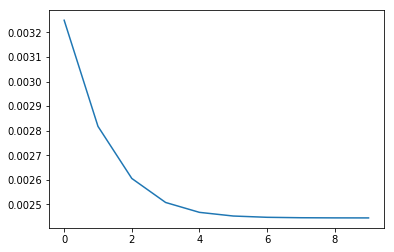

[0.003249695686166976, 0.0028175792933469767, 0.002605543393881438, 0.002507749636427574, 0.0024675236984269253, 0.0024525922928761677, 0.0024473761774607868, 0.002445616267617262, 0.0024450447717072176, 0.0024448764425680615]


In [9]:
neuron_list = [499,250,125,250,499]
nn = aec.Autoencoder(neuron_list)
inp = np.transpose([np.transpose(user_movie)])
print(np.shape(inp))
err = nn.train(inp,inp, 10)
plt.plot(err)
plt.show()
print(err)

In [11]:
file = open("epoch10_weights", "wb")
pickle.dump(nn.weights, file)

In [12]:
file = open("epoch10_autoencoder", "wb")
pickle.dump(nn, file)

In [16]:
file = open("error_epoch_10", "rb")
error = pickle.load(file)

In [25]:
error = [float(y) for x in error for y in x]

In [30]:
error = np.reshape(error, (10,1000))

In [34]:
for i in range(len(error)):
    print("Epoch " + str(i+1) + " error: " +  str(np.mean(error[i])))

Epoch 1 error: 34.53834037841138
Epoch 2 error: 33.351053316751546
Epoch 3 error: 32.84373930188353
Epoch 4 error: 32.580056840514715
Epoch 5 error: 32.475963143853825
Epoch 6 error: 32.44303314759971
Epoch 7 error: 32.43334519528129
Epoch 8 error: 32.43068690554934
Epoch 9 error: 32.43023901580883
Epoch 10 error: 32.43051440203852
